### Imports and Read CSVs

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis_functions as af
import seaborn as sns
import scipy.stats as stats

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Analyze train_df

#### Target Distribution (SalePrice)

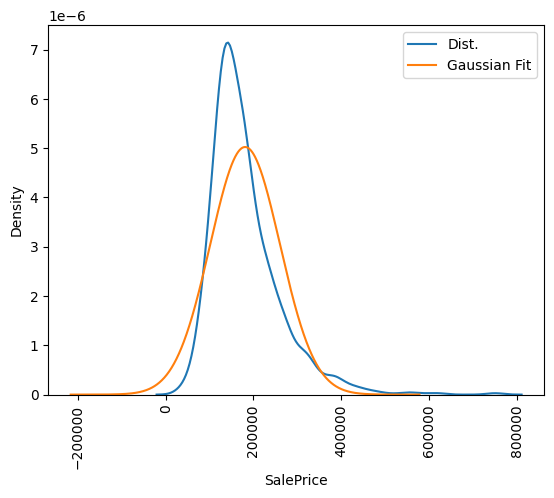

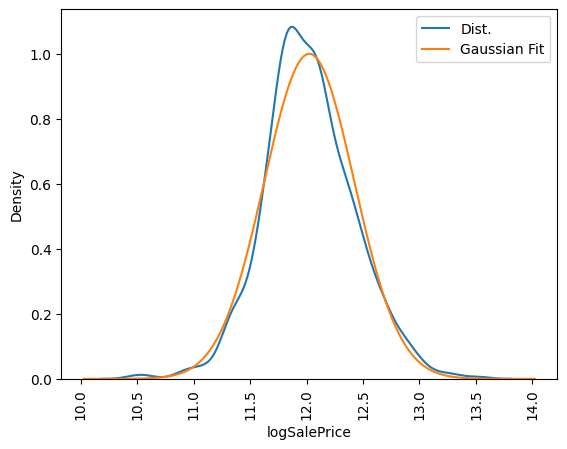

In [13]:
train_df['logSalePrice'] = np.log1p(train_df['SalePrice'])
af.plot_kde_distribution(train_df, 'SalePrice')
af.plot_kde_distribution(train_df, 'logSalePrice')

### use ln(1+x) to make target distribution more gaussian

#### Nan and Largest Category percentages

Utilities       0.999315
Street          0.995890
Condition2      0.989726
RoofMatl        0.982192
Heating         0.978082
GarageCond      0.961566
GarageQual      0.950689
LandSlope       0.946575
CentralAir      0.934932
Functional      0.931507
BsmtCond        0.921293
PavedDrive      0.917808
Electrical      0.914325
MiscFeature     0.907407
LandContour     0.897945
BsmtFinType2    0.883263
ExterCond       0.878082
SaleType        0.867808
Condition1      0.863014
BldgType        0.835616
dtype: float64

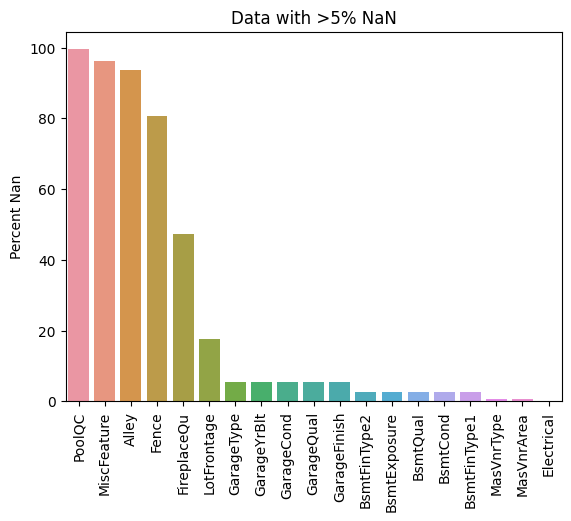

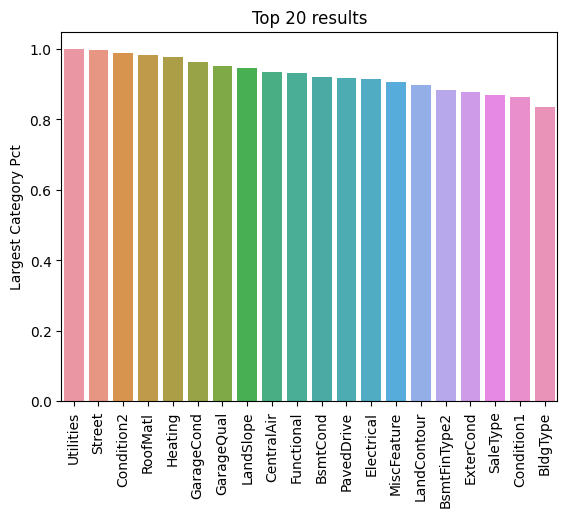

In [14]:
af.plot_nanpct(train_df)
af.plot_largecategorypct(train_df, n=20)

#### Analyze features

In [15]:
### Replace categories by integers when ordered (see data_description.txt)
Poor2Excel_map = dict(zip(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4]))
LotShape_map = dict(zip(['Reg','IR1','IR2','IR3'],[0,1,2,3]))
LandSlope_map = {'Gtl':0, 'Mod':1, 'Sev':2}
BsmtExposure_map = {'NA':0, 'No':0, 'Mn':1, 'Av':2, 'Gd':3}
BsmtFinType_map = {'NA':0, 'Unf':0, 'LwQ':1, 'BLQ':2, 'Rec':3, 'ALB':4, 'GLQ':5}
CentralAir_map = {'N':0, 'Y':1}
Functional_map = dict(zip(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'], [0,1,2,3,4,5,6,7]))

### Apply mappings
train_df.LotShape = train_df.LotShape.map(LotShape_map)
train_df.LandSlope = train_df.LandSlope.map(LandSlope_map)
train_df.BsmtExposure = train_df.BsmtExposure.map(BsmtExposure_map)
train_df.BsmtFinType1 = train_df.BsmtFinType1.map(BsmtFinType_map)
train_df.BsmtFinType2 = train_df.BsmtFinType2.map(BsmtFinType_map)
train_df.CentralAir = train_df.CentralAir.map(CentralAir_map)

Poor2Excel_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond', 'PoolQC']
for column in Poor2Excel_features:
    train_df[column] = train_df[column].map(Poor2Excel_map)

In [26]:
### Add features, check if they have good correlation
train_df['Bath'] = train_df.FullBath + 0.5*train_df.HalfBath
train_df['Porch'] = train_df.OpenPorchSF + train_df.EnclosedPorch + train_df['3SsnPorch'] + train_df.ScreenPorch

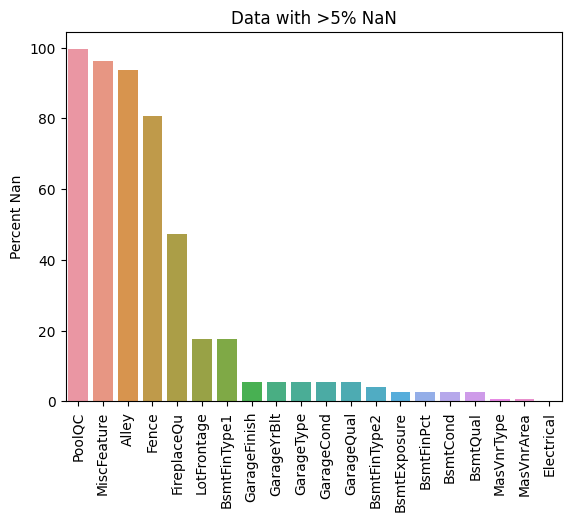

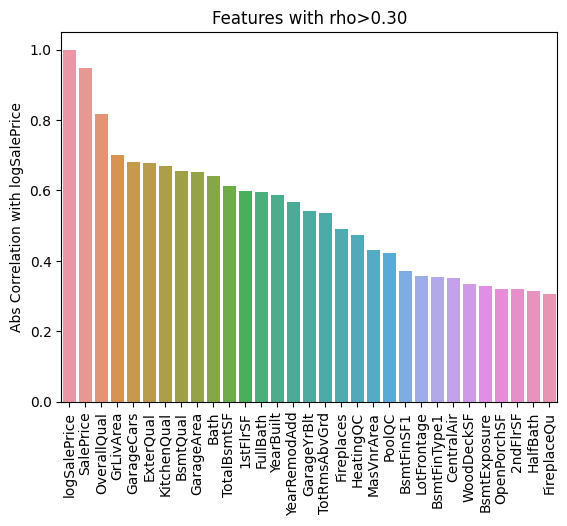

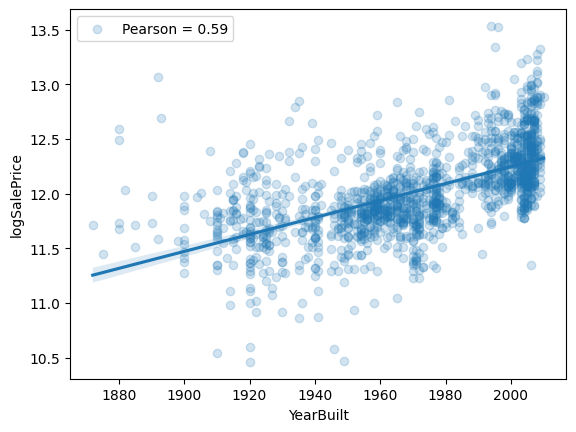

In [32]:
nanpcts = af.plot_nanpct(train_df) # all features
corrs = af.plot_correlations(train_df, 'logSalePrice') # numeric features

# for feat in corrs.index[2:10]:
#     af.plot_regression(train_df, feat, 'logSalePrice')


The numerical features that have the largest correlation with saleprice are not surprising. They include overall qualities, square footage, number of rooms and bathrooms, yearbuilt. We should also investigate the shapes of the distributions.

#### Distribution shape

In [37]:
af.plot_skews(train_df, n=20)

MiscVal          24.476794
PoolArea         14.828374
logPoolArea      14.363102
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
LandSlope         4.813682
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
BsmtFinType2      3.721835
CentralAir        3.530386
GarageCond        3.161554
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
Porch             2.000029
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
ExterCond         1.397219
1stFlrSF          1.376757
GrLivArea         1.366560
LotShape          1.309986
GarageQual        1.309356
BsmtExposure      1.174906
BsmtUnfSF         0.920268
FireplaceQu       0.902508
ExterQual         0.825988
2ndFlrSF          0.813030
OverallCond       0.693067
PoolQC            0.681691
TotRmsAbvGrd      0.676341
H